In [3]:
import pandas as pd
import numpy as np

"""
Data Loading
"""

# Read in data into a dataframe 
df = pd.read_csv('data/ny_energy_2016.csv')

df.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,...,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,...,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...


In [2]:
# Print the information of the first instance
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

In [4]:
"""
Data Cleaning and Formatting
"""

# Problem: some missing values are encoded as “Not Available”. 문자열 형태로 결측지 표현!
df[df == "Not Available"].any()

Order                                                         False
Property Id                                                   False
Property Name                                                 False
Parent Property Id                                            False
Parent Property Name                                          False
BBL - 10 digits                                               False
NYC Borough, Block and Lot (BBL) self-reported                 True
NYC Building Identification Number (BIN)                       True
Address 1 (self-reported)                                     False
Address 2                                                      True
Postal Code                                                   False
Street Number                                                 False
Street Name                                                   False
Borough                                                       False
DOF Gross Floor Area                            

In [4]:
# Replaces all the “Not Available” entries with np.nan

df.replace({'Not Available': np.nan}, inplace=True) 
df[df == "Not Available"].any()

Order                                                         False
Property Id                                                   False
Property Name                                                 False
Parent Property Id                                            False
Parent Property Name                                          False
BBL - 10 digits                                               False
NYC Borough, Block and Lot (BBL) self-reported                False
NYC Building Identification Number (BIN)                      False
Address 1 (self-reported)                                     False
Address 2                                                     False
Postal Code                                                   False
Street Number                                                 False
Street Name                                                   False
Borough                                                       False
DOF Gross Floor Area                            

In [5]:
# Converts columns that should be numeric to float 

for col in list(df.columns):
    # Select columns that should be numeric
    if('ft²' in col or 
        'kBtu' in col or
        'Metric Tons CO2e' in col or
        'kWh' in col or
        'therms' in col or
        'gal' in col or
        'Score' in col):
            
            # Convert the data type to float
            df[col] = df[col].astype(float)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11735 non-null  object 
 7   NYC Building Identification Number (BIN)                    11584 non-null  object 
 

In [6]:
"""
Missing Values
"""

# Getting a sense of how many missing values are in each column
ser_miss_cnt = df.isnull().sum().sort_values(ascending = False)
ser_miss_rate = ser_miss_cnt / len(df)
print(ser_miss_cnt)
print(ser_miss_rate)

Fuel Oil #1 Use (kBtu)                                        11737
Diesel #2 Use (kBtu)                                          11730
Address 2                                                     11539
Fuel Oil #5 & 6 Use (kBtu)                                    11152
District Steam Use (kBtu)                                     10810
Fuel Oil #4 Use (kBtu)                                        10425
3rd Largest Property Use Type - Gross Floor Area (ft²)        10262
3rd Largest Property Use Type                                 10262
Fuel Oil #2 Use (kBtu)                                         9165
2nd Largest Property Use Type                                  8005
2nd Largest Property Use - Gross Floor Area (ft²)              8005
Metered Areas  (Water)                                         4609
Water Intensity (All Water Sources) (gal/ft²)                  3984
Water Use (All Water Sources) (kgal)                           3984
Latitude                                        

In [7]:
# Remove any columns with more than threshold of missing rate
threshold = 0.5

print(ser_miss_rate[ser_miss_rate > 0.5])
del_list = ser_miss_rate[ser_miss_rate > 0.5].index

Fuel Oil #1 Use (kBtu)                                    0.999234
Diesel #2 Use (kBtu)                                      0.998638
Address 2                                                 0.982377
Fuel Oil #5 & 6 Use (kBtu)                                0.949430
District Steam Use (kBtu)                                 0.920313
Fuel Oil #4 Use (kBtu)                                    0.887536
3rd Largest Property Use Type - Gross Floor Area (ft²)    0.873659
3rd Largest Property Use Type                             0.873659
Fuel Oil #2 Use (kBtu)                                    0.780266
2nd Largest Property Use Type                             0.681509
2nd Largest Property Use - Gross Floor Area (ft²)         0.681509
dtype: float64


In [8]:
# Drop the columns
df.drop(columns=del_list, inplace=True)
df.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,10017,...,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,10032,...,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,10032,...,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,10032,...,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,10032,...,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...


In [9]:
"""
Exploratory Data Analysis
"""

# Visualization setup
%matplotlib
%config InlineBackend.figure_format = 'svg'

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
plt.ion() # enable the interactive mode

import seaborn as sns
sns.set()  # set plot styles


Using matplotlib backend: Qt5Agg


In [10]:
# Rename the score
df = df.rename(columns = {'ENERGY STAR Score': 'Score'})

# Plot the histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(df['Score'].dropna(), bins = 100, edgecolor = 'k')
plt.xlabel('Score')
plt.ylabel('Number of Buildings')
plt.title('Energy Star Score Distribution')

Text(0.5, 1.0, 'Energy Star Score Distribution')

In [11]:
# Plot the histogram of Site EUI
plt.hist(df['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black')
plt.xlabel('Site EUI')
plt.ylabel('Count')
plt.title('Site EUI Distribution')

Text(0.5, 1.0, 'Site EUI Distribution')

In [12]:
# Descriptive statistics
df['Site EUI (kBtu/ft²)'].describe()

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

In [13]:
df['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(10)

3173     51328.8
3170     51831.2
3383     78360.1
8269     84969.6
3263     95560.2
8268    103562.7
8174    112173.6
3898    126307.4
7       143974.4
8068    869265.0
Name: Site EUI (kBtu/ft²), dtype: float64

In [14]:
df.loc[df['Site EUI (kBtu/ft²)'] == 869265, :]


,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
8068,9984,4414323,234 Skillman,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3028937502,3028937502,"3390250 , 3338313",234 Skillman avenue,11211,...,912801.1,05/01/2017 11:34:14 PM,NaN,In Compliance,40.716233,-73.94141,1.0,34.0,477.0,East Williamsburg ...


In [15]:
"""
Removing Outliers
- IQR-based outlier detection and elimination
- Definition of an extreme outlier:
    x < Q1 - 3IQR or x > Q3 - 3IQR
"""

# Calculate Q1 and Q3
q1 = df['Site EUI (kBtu/ft²)'].quantile(0.25)
q3 = df['Site EUI (kBtu/ft²)'].quantile(0.75)

print('Q1 =', q1)
print('Q3 =', q3)



Q1 = 61.8
Q3 = 97.6


In [16]:
# IQR
iqr = q3-q1

# Upper/lower fences
# 1.5: mild outliers
# 3: extreme outliers

upper_fence = q3 + 3*iqr
lower_fence = q1 - 3*iqr

print('IQR =', iqr)
print('Upper fence =', upper_fence)
print('Lower fence =', lower_fence)

IQR = 35.8
Upper fence = 205.0
Lower fence = -45.599999999999994


In [17]:
# Obtain a refined dataset (without extreme outliers)
df = df[ (df['Site EUI (kBtu/ft²)'] < upper_fence) &
      (df['Site EUI (kBtu/ft²)'] > lower_fence) ]

df['Site EUI (kBtu/ft²)'].shape

(11319,)

In [18]:
# Histogram of Site EUI after outlier eliminations

plt.hist(df['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black')
plt.xlabel('Site EUI')
plt.ylabel('Count')
plt.title('Site EUI Distribution')

Text(0.5, 1.0, 'Site EUI Distribution')

In [19]:
"""
Looking for Relationships
- Investigate categorical variables and the target variable (Energy Star Score)
- Categorical variable 1: Largest Property Use Type: Property type of a building
- Categorical variable 2: Borough
"""

# Relationships between property types and scores

df_has_score = df.dropna(subset=['Score'])  # Select data with Score
types = df_has_score['Largest Property Use Type'].value_counts()   # Count buildings by the property type
types

Multifamily Housing                      7464
Office                                   1157
Hotel                                     202
Non-Refrigerated Warehouse                156
K-12 School                                97
Residence Hall/Dormitory                   96
Senior Care Community                      85
Distribution Center                        61
Retail Store                               57
Medical Office                             23
Hospital (General Medical & Surgical)      15
Financial Office                           12
Supermarket/Grocery Store                  10
Worship Facility                            9
Refrigerated Warehouse                      8
Wholesale Club/Supercenter                  3
Parking                                     3
Courthouse                                  2
Bank Branch                                 1
Name: Largest Property Use Type, dtype: int64

In [20]:
# Select property types whose frequencies are more than 100
types_100 = types[types.values > 100].index
types_100

Index(['Multifamily Housing', 'Office', 'Hotel', 'Non-Refrigerated Warehouse'], dtype='object')

In [21]:
# Plot the distribution of Scores for property types

for b_type in types_100:
    # Select buildings by property type
    subset = df[df['Largest Property Use Type'] == b_type]
    
    # Density plot of Energy Star Scores
    sns.kdeplot(subset['Score'].dropna(),
               label=b_type, alpha=0.8)

plt.xlabel('Energy Star Scores')
plt.ylabel('Density')
plt.title('Density Plot of Energy Star Scores by Building Type')
plt.legend(loc='best')

In [22]:
# Examine another categorical variable 'Borough'
boroughs = df_has_score['Borough'].value_counts()  # Count buildings by the borough
print(boroughs)

boroughs = boroughs.index
boroughs

Manhattan        3985
Brooklyn         1947
Queens           1707
Bronx            1655
Staten Island     119
Name: Borough, dtype: int64


Index(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'], dtype='object')

In [23]:
# Plot each borough distribution of scores
for borough in boroughs:
    # Select buildings by borough
    subset = df[df['Borough'] == borough]
    
    # Density plot of Energy Star Scores
    sns.kdeplot(subset['Score'].dropna(),
               label=borough)

plt.xlabel("Energy Star Scores")
plt.ylabel('Density')
plt.title("Density Plot of Energy Star Scores by Borough")
plt.legend(loc='best')
    

In [24]:
"""
Correlations between Features and Target Variable
"""

# Calculate Pearson correlation coefficients between each feature and the target variable
corr = df.corr()['Score'].sort_values()
corr

Site EUI (kBtu/ft²)                                          -0.723864
Weather Normalized Site EUI (kBtu/ft²)                       -0.713993
Weather Normalized Source EUI (kBtu/ft²)                     -0.645542
Source EUI (kBtu/ft²)                                        -0.641037
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.358394
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.346046
Direct GHG Emissions (Metric Tons CO2e)                      -0.147792
Weather Normalized Site Natural Gas Use (therms)             -0.135211
Natural Gas Use (kBtu)                                       -0.133648
Year Built                                                   -0.121249
Total GHG Emissions (Metric Tons CO2e)                       -0.113136
Electricity Use - Grid Purchase (kBtu)                       -0.050639
Weather Normalized Site Electricity (kWh)                    -0.048207
Latitude                                                     -0.048196
Proper

In [25]:
"""
Two-Variable Plots
- Variable 1: Site EUI
- Variable 2: Largest Property Use Type
- Target: Energy Star Score
"""

# Extract the building types
df['Largest Property Use Type'] = df.dropna(subset = ['Score'])['Largest Property Use Type']

In [26]:
# Limit to building types with more than 100 observations
print(types_100)
df = df[df['Largest Property Use Type'].isin(types_100)]
df.shape

Index(['Multifamily Housing', 'Office', 'Hotel', 'Non-Refrigerated Warehouse'], dtype='object')


(8979, 49)

In [27]:
# Scatterplot of Score vs Site EUI

sns.lmplot('Site EUI (kBtu/ft²)', 'Score',
          hue='Largest Property Use Type', data=df,
          scatter_kws={'alpha': 0.8}, fit_reg=False,
          size=12, aspect=1.2)

plt.xlabel('Site EUI')
plt.ylabel('Enery Star Score')
plt.title('Energy Star Score vs Site EUI')


D:\dev\anaconda\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Energy Star Score vs Site EUI')

In [28]:
"""
Pairs Plot
"""

# Select the columns to plot
df_plot = df[['Score',
              'Site EUI (kBtu/ft²)',
              'Weather Normalized Site EUI (kBtu/ft²)',
              'Weather Normalized Source EUI (kBtu/ft²)',
              'Source EUI (kBtu/ft²)',
              'Weather Normalized Site Electricity Intensity (kWh/ft²)',
              'Total GHG Emissions (Metric Tons CO2e)']]

In [29]:
# Rename columns
df_plot.rename(columns={'Site EUI (kBtu/ft²)':
                        'Site EUI',
                       'Weather Normalized Site EUI (kBtu/ft²)':
                        'Weather Norm Site EUI',
                       'Weather Normalized Source EUI (kBtu/ft²)':
                        'Weather Norm Src EUI)',
                       'Source EUI (kBtu/ft²)':
                        'Source EUI',
                       'Weather Normalized Site Electricity Intensity (kWh/ft²)':
                        'Weather Norm Site Elec Intensity',
                       'Total GHG Emissions (Metric Tons CO2e)':
                       'Total GHG Emissions'}, inplace=True)

D:\dev\anaconda\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [30]:
# Replace the inf with nan
df_plot = df_plot.replace({np.inf: np.nan, -np.inf: np.nan})

# Drop NA values
df_plot.dropna(inplace=True)

In [21]:
# Function to calculate correlation coefficient between two columns

# Plot a correlation matrix using pairplot
sns.pairplot(df_plot, kind='reg', diag_kind='kde', 
            plot_kws={'scatter_kws': {'alpha': 0.1}})


NameError: name 'sns' is not defined

In [31]:
"""
Feature Extraction & Selection
"""

# Create columns with square root and log of numeric columns

df_numeric = df.select_dtypes('number') # select the numeric columns

for col in df_numeric.columns:
    # Skip the Energy Star Score column
    if col == 'Score':
        continue
    else:
        df_numeric['sqrt_' + col] = np.sqrt(df_numeric[col])
        df_numeric['log_' + col] = np.log(df_numeric[col])


<ipython-input-31-c6984423d577>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric['sqrt_' + col] = np.sqrt(df_numeric[col])
<ipython-input-31-c6984423d577>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric['log_' + col] = np.log(df_numeric[col])
D:\dev\anaconda\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\dev\anaconda\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: inv

In [33]:
# One-hot encoding for the categorical columns

df_categoric = df[['Borough', 'Largest Property Use Type']]  # Select the categorical columns
df_categoric.head()

,Borough,Largest Property Use Type
12,NaN,Multifamily Housing
18,NaN,Multifamily Housing
19,Manhattan,Multifamily Housing
20,Manhattan,Multifamily Housing
21,NaN,Multifamily Housing


In [34]:
df_categoric = pd.get_dummies(df_categoric)  # One-hot encoding
df_categoric.head()

,Borough_Bronx,Borough_Brooklyn,Borough_Manhattan,Borough_Queens,Borough_Staten Island,Largest Property Use Type_Hotel,Largest Property Use Type_Multifamily Housing,Largest Property Use Type_Non-Refrigerated Warehouse,Largest Property Use Type_Office
12,0,0,0,0,0,0,1,0,0
18,0,0,0,0,0,0,1,0,0
19,0,0,1,0,0,0,1,0,0
20,0,0,1,0,0,0,1,0,0
21,0,0,0,0,0,0,1,0,0


In [25]:
# Join the two DataFrames using concat
df_transformed = pd.concat([df_numeric, df_categoric], axis=1)

# Drop buildings without an Energy Star Score
df_transformed.dropna(subset=['Score'], inplace=True)

NameError: name 'df_numeric' is not defined

In [26]:
df_transformed.shape

NameError: name 'df_transformed' is not defined

In [ ]:
"""
Remove Collinear Features
"""

df_plot = df[['Weather Normalized Site EUI (kBtu/ft²)', 
              'Site EUI (kBtu/ft²)']].dropna()

plt.plot(df_plot['Site EUI (kBtu/ft²)'], 
         df_plot['Weather Normalized Site EUI (kBtu/ft²)'], 
         'bo')
plt.xlabel('Site EUI')
plt.ylabel('Weather Norm EUI')
plt.title('Weather Norm EUI vs Site EUI, R = %0.4f' % 
          np.corrcoef(df[['Weather Normalized Site EUI (kBtu/ft²)',
                          'Site EUI (kBtu/ft²)']].dropna(), rowvar=False)[0][1]);

In [29]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = x['Score']
    x = x.drop(columns = ['Score'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
                          'Water Use (All Water Sources) (kgal)',
                          'log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    # Add the score back in to the data
    x['Score'] = y
               
    return x

In [28]:
# Remove the collinear features above a specified correlation coefficient
collinear_threshold = 0.6
features = remove_collinear_features(df_transformed, collinear_threshold)

NameError: name 'remove_collinear_features' is not defined

In [30]:
# Remove any columns with all na values
features.dropna(axis=1, how = 'all', inplace=True)
features.shape

NameError: name 'features' is not defined

In [31]:

features.info()

NameError: name 'features' is not defined

In [35]:
"""
Split Into Training and Testing Sets
"""

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

# Separate out the features and targets
targets = pd.DataFrame(features['Score']) # y: vector
features = features.drop(columns='Score') # X: matrix

# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Handle the missing values with imputations
features.interpolate(inplace=True)
features.bfill(inplace=True)

# Split into 70% training and 30% testing set
X_train, X_test, y_train, y_test = train_test_split(
    features, targets, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape) # 학습 시 정답지
print(y_test.shape) # 테스트 시 정답

NameError: name 'features' is not defined

In [33]:
# Train the model

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)


NameError: name 'X_train' is not defined

In [34]:
y_hat = model.predict(X_test) 
print(y_test.values.reshape(-1), y_hat)

NameError: name 'X_test' is not defined

In [36]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_hat)

NameError: name 'y_test' is not defined

In [ ]:
print("Baseline Performance on the test set: MAE = %0.4f" % mae)

In [ ]:
plt.plot(y_test.values.reshape(-1), label='Actual')
plt.plot(y_hat, label='Prediction')
plt.legend(loc='best')

In [ ]:
plt.plot(y_test.values.reshape(-1), y_hat, 'bo')
plt.xlabel("Actual")
plt.ylabel("Prediction")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, "o-")
    axes[2].fill_between(
        fit_times_mean,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt




NameError: name 'X_train' is not defined

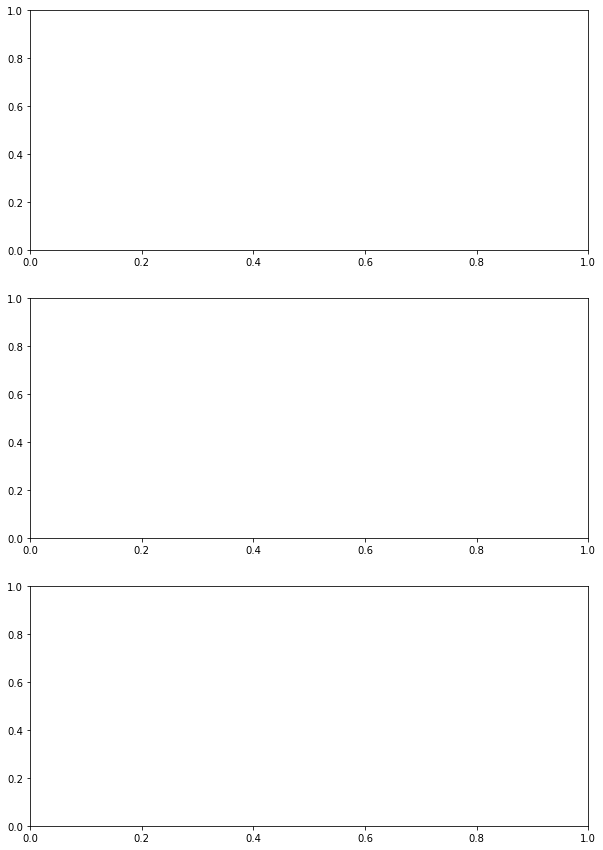

In [37]:
from sklearn import linear_model
esimator = linear_model.Lasso(alpha=0.1)

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# X, y = load_digits(return_X_y=True)

title = "Learning Curves (Random Forest Regressor)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

# estimator = RandomForestRegressor()

plot_learning_curve(
    estimator, title, X_train, y_train, axes=axes[:], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)



In [38]:
title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(
    estimator, title, X_train, y_train, axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

plt.show()

NameError: name 'X_train' is not defined

In [39]:
X = X_train.values
y = y_train.values

NameError: name 'X_train' is not defined

In [ ]:
"""
Benchmark
"""

df_transformed.drop(columns=['sqrt_Longitude', 'log_Longitude', 'Score'], inplace=True)

# Replace the inf and -inf with nan (required for later imputation)
df_transformed.replace({np.inf: np.nan, -np.inf: np.nan}, inplace=True)

df_transformed.interpolate(inplace=True)
df_transformed.bfill(inplace=True)
df_transformed.ffill(inplace=True)

X_train, X_test, y_train, y_test = train_test_split(
    df_transformed, targets, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)


In [ ]:
y_hat_two = model.predict(X_test)
y_hat_two

In [ ]:
mae = mean_absolute_error(y_test, y_hat_two)
print("Baseline Performance on the test set: MAE = %0.4f" % mae)

In [ ]:
plt.plot(y_test.values.reshape(-1), label='Actual')
plt.plot(y_hat_two, label='Prediction')
plt.legend(loc='best')

In [ ]:
plt.plot(y_test.values.reshape(-1), y_hat_two, 'bo')
plt.xlabel("Actual")
plt.ylabel("Prediction")